## Импорт

In [193]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

np.set_printoptions(precision=3, suppress=True)
encoder = OrdinalEncoder()

In [194]:
# Графики строятся при помощи seaborn.
!pip install -q seaborn

In [195]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.19.0


##Загрузка данных

In [196]:
!git clone https://github.com/romashka19yyy-prog/VKR

fatal: destination path 'VKR' already exists and is not an empty directory.


In [197]:
#путь до датасета
dataset_path ="/content/VKR/X_bp.csv"

In [198]:
raw_dataset = pd.read_csv(dataset_path, index_col=0)

In [199]:
raw_dataset.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [200]:
#Выполним копирование базы данных в рабочую копию
dataset = raw_dataset.copy()
dataset.tail()


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067
1022,3.808020,1890.413468,417.316232,129.183416,27.474763,300.952708,758.747882,74.309704,2856.328932,194.754342


In [201]:
print(dataset.dtypes)

Соотношение матрица-наполнитель         float64
Плотность, кг/м3                        float64
модуль упругости, ГПа                   float64
Количество отвердителя, м.%             float64
Содержание эпоксидных групп,%_2         float64
Температура вспышки, С_2                float64
Поверхностная плотность, г/м2           float64
Модуль упругости при растяжении, ГПа    float64
Прочность при растяжении, МПа           float64
Потребление смолы, г/м2                 float64
dtype: object


In [202]:
#проверяем наличие пустых значений
dataset.isna().sum()

,0
Соотношение матрица-наполнитель,0
"Плотность, кг/м3",0
"модуль упругости, ГПа",0
"Количество отвердителя, м.%",0
"Содержание эпоксидных групп,%_2",0
"Температура вспышки, С_2",0
"Поверхностная плотность, г/м2",0
"Модуль упругости при растяжении, ГПа",0
"Прочность при растяжении, МПа",0
"Потребление смолы, г/м2",0


## Корреляция

<Axes: >

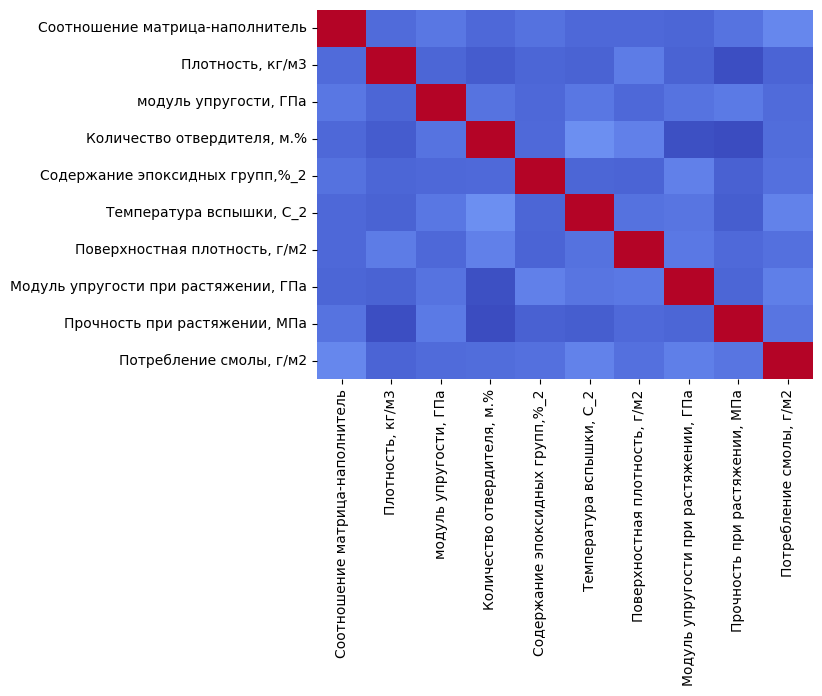

In [203]:
sns.heatmap(dataset.corr(), cmap = 'coolwarm',  cbar = False)

In [204]:
#TOP K коррелируемых признаков
k = 10
corrmat = dataset.corr()
top_corr_features = corrmat.nlargest(k, 'Соотношение матрица-наполнитель')[['Соотношение матрица-наполнитель']]
top_corr_features

,Соотношение матрица-наполнитель
Соотношение матрица-наполнитель,1.000000
"Потребление смолы, г/м2",0.072531
"модуль упругости, ГПа",0.031700
"Прочность при растяжении, МПа",0.024148
"Содержание эпоксидных групп,%_2",0.019766
"Плотность, кг/м3",0.003841
"Температура вспышки, С_2",-0.004776
"Поверхностная плотность, г/м2",-0.006272
"Количество отвердителя, м.%",-0.006445
"Модуль упругости при растяжении, ГПа",-0.008411


##Разделим данные на обучающий и тестовый набор

In [205]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

##Просмотрим совместное распределение нескольких пар столбцов из обучающего набора.

In [206]:
train_dataset.tail()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
464,2.440166,1980.132394,357.938256,130.541848,21.177094,290.618547,119.756192,68.900703,1577.288189,129.038238
25,2.046471,2037.631811,707.570887,101.617251,23.146393,312.307205,547.601219,73.817067,2624.026407,178.198556
110,3.490162,1986.340110,1257.779003,93.748554,24.593272,338.101359,76.682693,76.179383,2605.949634,261.819468
149,1.916843,2109.441659,691.301685,116.606570,21.611736,341.789754,372.705290,72.680026,2085.866383,265.171039
152,1.493196,1997.212555,1010.784737,107.549456,17.300539,322.532498,165.345449,72.775930,2144.891733,160.115495


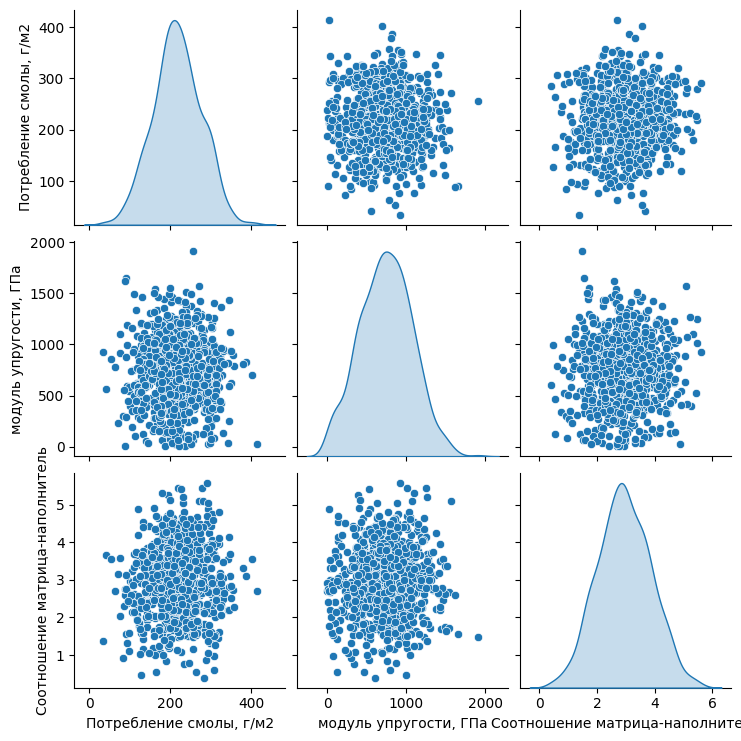

In [207]:
train_dataset['Соотношение матрица-наполнитель'] = train_dataset['Соотношение матрица-наполнитель'].fillna(pd.NA)
sns.pairplot(train_dataset[["Потребление смолы, г/м2", "модуль упругости, ГПа", "Соотношение матрица-наполнитель" ]].astype(float), diag_kind='kde')

In [208]:
#проверим общую статистику
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,818.0,2.943975,0.922190,0.389403,2.320191,2.919678,3.583641,5.591742
"Плотность, кг/м3",818.0,1974.377546,74.987638,1731.764635,1922.343882,1975.555671,2021.186675,2207.773481
"модуль упругости, ГПа",818.0,741.514342,329.799496,2.436909,502.628230,742.886633,966.871905,1911.536477
"Количество отвердителя, м.%",818.0,111.192968,27.797189,29.956150,93.306043,111.507330,129.689233,198.953207
"Содержание эпоксидных групп,%_2",818.0,22.249671,2.395012,14.254985,20.607747,22.267857,23.952628,33.000000
"Температура вспышки, С_2",818.0,286.243917,41.283747,100.000000,260.274330,286.220763,313.518533,403.652861
"Поверхностная плотность, г/м2",818.0,490.129423,280.043448,1.894093,273.012973,463.881777,697.683605,1399.542362
"Модуль упругости при растяжении, ГПа",818.0,73.368702,3.091888,64.054061,71.337855,73.342472,75.486822,82.682051
"Прочность при растяжении, МПа",818.0,2467.736562,475.680895,1036.856605,2148.096359,2457.959767,2759.418283,3848.436732
"Потребление смолы, г/м2",818.0,217.257584,59.206795,33.803026,179.604490,217.277006,256.462864,414.590628


##Отделим объекты от меток, нормализуем данные

In [209]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Соотношение матрица-наполнитель')
test_labels = test_features.pop('Соотношение матрица-наполнитель')

In [210]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
Соотношение матрица-наполнитель,2.943975,0.922190
"Плотность, кг/м3",1974.377546,74.987638
"модуль упругости, ГПа",741.514342,329.799496
"Количество отвердителя, м.%",111.192968,27.797189
"Содержание эпоксидных групп,%_2",22.249671,2.395012
"Температура вспышки, С_2",286.243917,41.283747
"Поверхностная плотность, г/м2",490.129423,280.043448
"Модуль упругости при растяжении, ГПа",73.368702,3.091888
"Прочность при растяжении, МПа",2467.736562,475.680895
"Потребление смолы, г/м2",217.257584,59.206795


##Слой нормализации

In [211]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [212]:
normalizer.adapt(np.array(train_features))

In [213]:
print(normalizer.mean.numpy())

[[1974.378  741.514  111.193   22.25   286.244  490.129   73.369 2467.737
   217.258]]


In [214]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[1977.62  123.73  135.71   18.52  318.44  171.68   72.97 2220.73  131.88]]

Normalized: [[ 0.04 -1.87  0.88 -1.56  0.78 -1.14 -0.13 -0.52 -1.44]]


##Одномерная линейная регрессия

In [215]:
mod = np.array(train_dataset['Потребление смолы, г/м2'])

mod_normalizer = layers.Normalization(input_shape=[1,], axis=None)
mod_normalizer.adapt(mod)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [216]:
mod_model = tf.keras.Sequential([
    mod_normalizer,
    layers.Dense(units=1)
])

mod_model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_11                │ (None, 1)              │             3 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

In [217]:
#Запустим необученную модель на первых 10 значениях
mod_model.predict(mod[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


array([[ 0.425],
       [-0.29 ],
       [-0.414],
       [ 0.146],
       [ 0.401],
       [-0.014],
       [ 0.326],
       [ 0.105],
       [-0.209],
       [ 0.345]], dtype=float32)

In [218]:
#настроим обучение
mod_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [219]:
#обучим модель в течение 100 эпох
%%time
history = mod_model.fit(
    train_features['Потребление смолы, г/м2'],
    train_labels,
    epochs=100,
    # Отключаем отчеты по процессу.
    verbose=0,
    # Используем 20% обучающих данных для валидации.
    validation_split = 0.2)

CPU times: user 17.4 s, sys: 511 ms, total: 17.9 s
Wall time: 25.1 s


In [220]:
#визуализация
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.750552,0.697036,95
96,0.753129,0.723563,96
97,0.758037,0.713508,97
98,0.755935,0.699508,98
99,0.756586,0.701660,99


In [221]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='Ошибка обучения')
  plt.plot(history.history['val_loss'], label='Ошибка валидации')
  plt.ylim([0, 10])
  plt.xlabel('Эпохи обучения')
  plt.ylabel('Ошибка прогноза по [Соотношение матрица-наполнитель]')
  plt.legend()
  plt.grid(True)

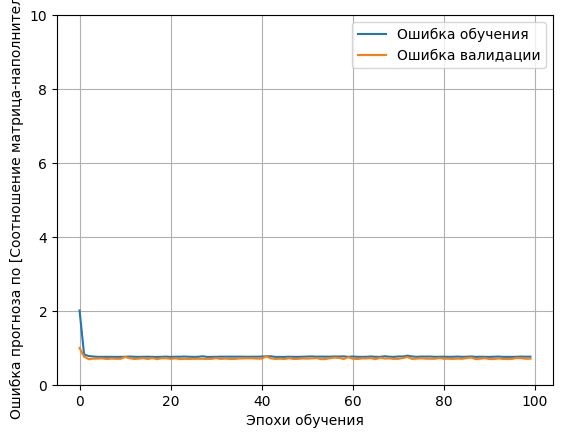

In [222]:
plot_loss(history)

In [223]:
#соберем результат
test_results = {}

test_results['mod_model'] = mod_model.evaluate(
    test_features['Потребление смолы, г/м2'],
    test_labels, verbose=0)

In [224]:
#прогнозы модели в зависимости от входных данных:
x = tf.linspace(0.0, 250, 251)
y = mod_model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [225]:
def plot_mod(x, y):
  plt.scatter(train_features['Потребление смолы, г/м2'], train_labels, label='Истинные значения')
  plt.plot(x, y, color='k', label='Прогнозы')
  plt.xlabel('Потребление смолы, г/м2')
  plt.ylabel('Соотношение матрица-наполнитель')
  plt.legend()

[np.float32(217.25758), np.float32(3501.1592), np.int64(0)]
[array([[0.008]], dtype=float32), array([2.963], dtype=float32)]


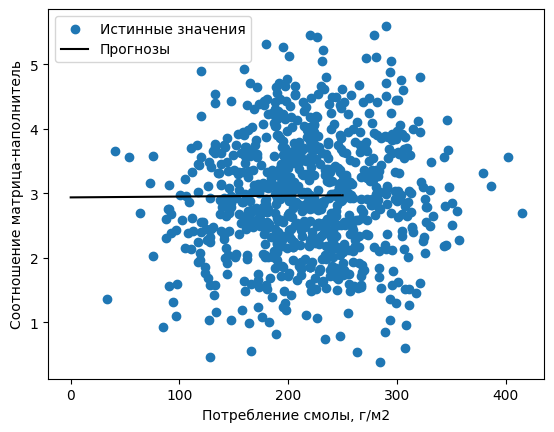

In [226]:
plot_mod(x, y)
# выводим веса на экран
for layer in mod_model.layers:
    weights = layer.get_weights()
    print(weights)

##Многомерная линейная регрессия

In [227]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [228]:
linear_model.predict(train_features[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


array([[ 1.137],
       [ 1.007],
       [ 0.096],
       [-0.979],
       [ 0.206],
       [-0.122],
       [-0.132],
       [-0.489],
       [ 0.727],
       [ 1.288]], dtype=float32)

In [229]:
linear_model.layers[1].kernel

<Variable path=sequential_16/dense_26/kernel, shape=(9, 1), dtype=float32, value=[[-0.595]
 [-0.457]
 [-0.227]
 [-0.354]
 [-0.387]
 [ 0.021]
 [ 0.089]
 [ 0.136]
 [-0.252]]>

In [230]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')
linear_model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_10                │ (10, 9)                │            19 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (10, 1)                │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29 (120.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 19 (80.00 B)

In [231]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Подавляем вывол протоколов обучения.
    verbose=0,
    # Используем 20% обучающих данных для валидации.
    validation_split = 0.2)

CPU times: user 14.5 s, sys: 528 ms, total: 15.1 s
Wall time: 14.5 s


[array([1974.378,  741.514,  111.193,   22.25 ,  286.244,  490.129,
         73.369, 2467.737,  217.258], dtype=float32), array([  5616.271, 108634.74 ,    771.739,      5.729,   1702.264,
        78328.46 ,      9.548, 225995.7  ,   3501.159], dtype=float32), np.int64(0)]
[array([[-0.133],
       [ 0.084],
       [ 0.217],
       [-0.019],
       [ 0.061],
       [ 0.162],
       [-0.119],
       [ 0.13 ],
       [-0.002]], dtype=float32), array([2.819], dtype=float32)]


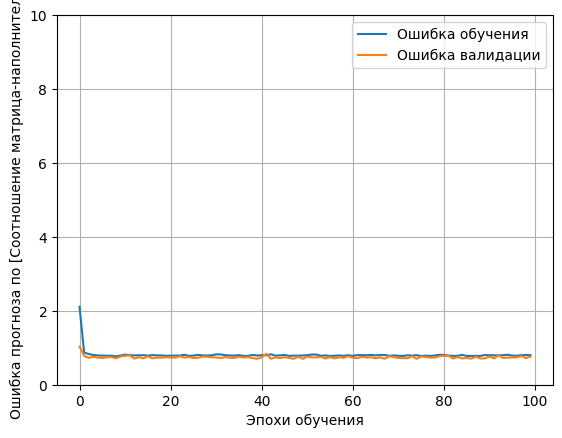

In [232]:
plot_loss(history)
# выводим веса на экран
for layer in linear_model.layers:
    weights = layer.get_weights()
    print(weights)

In [233]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

##Решение задачи одномерной регрессии с помощью многослойной нейросети (DNN)

In [234]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [235]:
dnn_mod_model = build_and_compile_model(mod_normalizer)

In [236]:
dnn_mod_model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_11                │ (None, 1)              │             3 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,356 (17.02 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 3 (16.00 B)

In [237]:
#Обучим модель с помошью функции Keras `Model.fit`:
%%time
history = dnn_mod_model.fit(
    train_features['Потребление смолы, г/м2'],
    train_labels,
    validation_split=0.2,
    verbose=1, epochs=400)

Epoch 1/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8294 - val_loss: 2.4118
Epoch 2/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.2476 - val_loss: 1.7061
Epoch 3/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5464 - val_loss: 1.1842
Epoch 4/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2145 - val_loss: 0.9973
Epoch 5/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1122 - val_loss: 0.8721
Epoch 6/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9352 - val_loss: 0.7875
Epoch 7/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8802 - val_loss: 0.7442
Epoch 8/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8536 - val_loss: 0.7180
Epoch 9/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8047 - val_loss: 0.7048
Epoch 10/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7627 - val_loss: 0.6928
Epoch 11/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7680 - val_loss: 0.6921
Epoch 12/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0

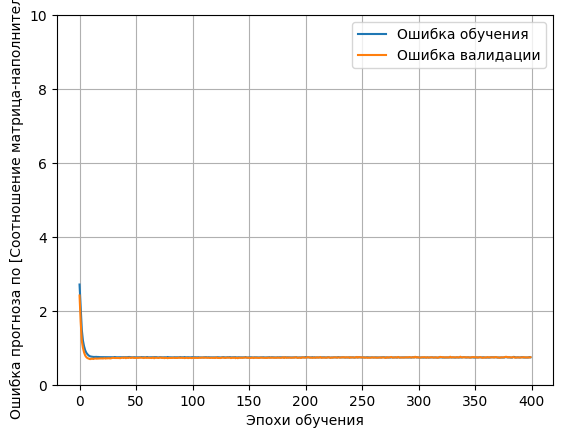

In [238]:
plot_loss(history)

In [239]:
x = tf.linspace(0.0, 250, 251)
y = dnn_mod_model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


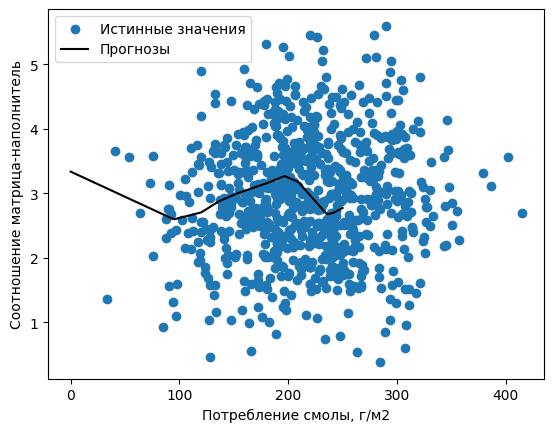

In [240]:
plot_mod(x, y)

In [241]:
#соберем результат
test_results['dnn_mod_model'] = dnn_mod_model.evaluate(
    test_features['Потребление смолы, г/м2'], test_labels,
    verbose=0)

##Решение задачи многомерной регрессии с помощью многослойной нейросети (DNN)

In [242]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_10                │ (10, 9)                │            19 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19 (80.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 19 (80.00 B)

In [243]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=400)

CPU times: user 59.5 s, sys: 2.09 s, total: 1min 1s
Wall time: 1min 1s


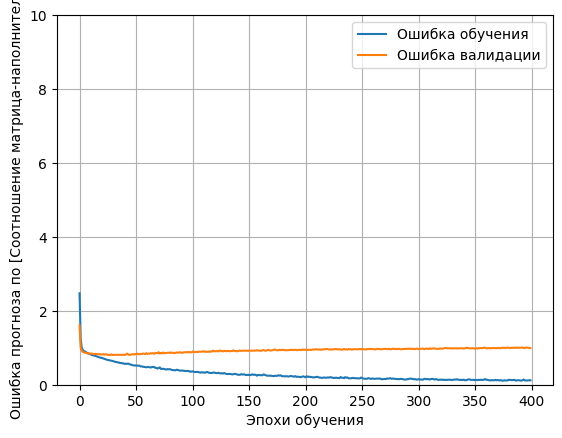

In [244]:
plot_loss(history)

In [245]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

##Качество модели

In [246]:
pd.DataFrame(test_results, index=['Mean absolute error [Соотношение матрица-наполнитель]']).T

,Mean absolute error [Соотношение матрица-наполнитель]
mod_model,0.693588
linear_model,0.771949
dnn_mod_model,0.729636
dnn_model,1.006272


##Выполнение прогноза по mod_model

In [247]:
test_predictions = mod_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('Истинные значения [Соотношение матрица-наполнитель]')
plt.ylabel('Предсказанные значения [Соотношение матрица-наполнитель]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>